<a href="https://colab.research.google.com/github/dboyko44/ML-Final-Project/blob/main/ML_Final_Project_team.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import seaborn as sns
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

dft22=pd.read_excel('teamreport_31-12-2021_30-05-2022.xlsx')
dfSOE22=pd.read_excel('SOE data 2022.xlsx')
for i in range(len(dft22)):
  dft22['Day'][i]=pd.Timestamp(dft22["Day"][i])
dft22.sort_values(by='Day',inplace=True)

dft23=pd.read_excel('teamreport_31-12-2022_30-12-2023.xlsx')
dfSOE23=pd.read_excel('SOE data 2023.xlsx')
for i in range(len(dft23)):
  dft23['Day'][i]=pd.Timestamp(dft23["Day"][i])
dft23.sort_values(by='Day',inplace=True)

def time_to_num(time_str):
    hh, mm , ss = map(int, time_str.split(':'))
    return ss + 60*(mm + 60*hh)

for i in range(0,len(dft22)):
  if dft22['Maximum speed [mph]'][i]>27.5:
    ind=dft22[(dft22['Duration']==dft22['Duration'][i])].index
    dft22=dft22.drop(ind)

dft22=dft22.reset_index(drop=True)

for i in range(0,len(dft22)):
  dft22=dft22.replace([dft22['Duration'][i]],[dft22['Duration'][i].strftime("%H:%M:%S")])
  dft22=dft22.replace([dft22['Duration'][i]],[time_to_num(dft22['Duration'][i])])
for i in range(0,len(dft23)):
  dft23=dft23.replace([dft23['Duration'][i]],[dft23['Duration'][i].strftime("%H:%M:%S")])
  dft23=dft23.replace([dft23['Duration'][i]],[time_to_num(dft23['Duration'][i])])

<ipython-input-35-6f8d63f380d8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft22['Day'][i]=pd.Timestamp(dft22["Day"][i])
<ipython-input-35-6f8d63f380d8>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft23['Day'][i]=pd.Timestamp(dft23["Day"][i])


In [36]:
for i in range(len(dfSOE22)-1):
  start_date22=dfSOE22['Day'][i]
  end_date22=dfSOE22['Day'][i+1]
  group22=dft22[(dft22['Day']>start_date22) & (dft22['Day']<=end_date22)].index.tolist()
  print(group22)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
[27, 28, 29, 30]
[31, 32, 33]
[34, 35, 36, 37]
[38, 39, 40]
[41, 42, 43, 44, 45, 46, 47]
[48, 49, 50, 51, 52, 53]
[54, 55, 56, 57]
[58, 59, 60]
[61, 62, 63, 64, 65]
[66, 67, 68, 69, 70, 71]
[72, 73, 74, 75, 76, 77]
[78, 79, 80, 81, 82, 83]
[84, 85, 86, 87, 88, 89, 90]
[91, 92, 93]
[94, 95, 96, 97, 98, 99, 100, 101]


In [37]:
for i in range(len(dfSOE23)-1):
  start_date23=dfSOE23['Day'][i]
  end_date23=dfSOE23['Day'][i+1]
  group23=dft23[(dft23['Day']>start_date23) & (dft23['Day']<=end_date23)].index.tolist()
  print(group23)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
[19, 20, 21, 22, 23, 24, 25]
[26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]
[38, 39, 40]
[41, 42, 43]
[44, 45, 46, 47, 48, 49, 50]
[51, 52, 53, 54, 55, 56]
[57]
[58, 59]
[60, 61, 62]
[63, 64, 65]
[66, 67, 68]
[69, 70, 71, 72, 73]


In [38]:
dfin22=pd.DataFrame(columns=['Length [days]','Average heart rate [bpm]','Average distance [yd]','Average speed [mph]', 'Average calories [kcal]', 'Average training load','Total training load'])
dfin23=pd.DataFrame(columns=['Length [days]','Average heart rate [bpm]','Average distance [yd]','Average speed [mph]', 'Average calories [kcal]', 'Average training load','Total training load'])

dfin22=dfin22.iloc[0:0]
for i in range(len(dfSOE22)-1):
  start_date22=dfSOE22['Day'][i]
  end_date22=dfSOE22['Day'][i+1]
  group22=dft22[(dft22['Day']>start_date22) & (dft22['Day']<=end_date22)].index.tolist()
  length22=len(group22)
  avgheartrate22=np.mean(dft22['HR avg [bpm]'][group22[0]:group22[-1]+1])    
  avgdistance22=np.mean(dft22['Total distance [yd]'][group22[0]:group22[-1]+1])
  avgspeed22=np.mean(dft22['Average speed [mph]'][group22[0]:group22[-1]+1])
  avgcal22=np.mean(dft22['Calories [kcal]'][group22[0]:group22[-1]+1])
  avgtload22=np.mean(dft22['Training load score'][group22[0]:group22[-1]+1])
  tottload22=sum(dft22['Training load score'][group22[0]:group22[-1]+1])
  dfin22.loc[len(dfin22.index)]=[length22, avgheartrate22,avgdistance22,avgspeed22,avgcal22,avgtload22,tottload22]

dfSOE22=dfSOE22.drop(0)

dfin23=dfin23.iloc[0:0]
for i in range(len(dfSOE23)-1):
  start_date23=dfSOE23['Day'][i]
  end_date23=dfSOE23['Day'][i+1]
  group23=dft23[(dft23['Day']>start_date23) & (dft23['Day']<=end_date23)].index.tolist()
  length23=len(group23)
  avgheartrate23=np.mean(dft23['HR avg [bpm]'][group23[0]:group23[-1]+1])    
  avgdistance23=np.mean(dft23['Total distance [yd]'][group23[0]:group23[-1]+1])
  avgspeed23=np.mean(dft23['Average speed [mph]'][group23[0]:group23[-1]+1])
  avgcal23=np.mean(dft23['Calories [kcal]'][group23[0]:group23[-1]+1])
  avgtload23=np.mean(dft23['Training load score'][group23[0]:group23[-1]+1])
  tottload23=sum(dft23['Training load score'][group23[0]:group23[-1]+1])
  dfin23.loc[len(dfin23.index)]=[length23, avgheartrate23,avgdistance23,avgspeed23,avgcal23,avgtload23,tottload23]

dfSOE23=dfSOE23.drop(0)

<ipython-input-38-b73a86aa1506>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfin23.loc[len(dfin23.index)]=[length23, avgheartrate23,avgdistance23,avgspeed23,avgcal23,avgtload23,tottload23]
<ipython-input-38-b73a86aa1506>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfin23.loc[len(dfin23.index)]=[length23, avgheartrate23,avgdistance23,avgspeed23,avgcal23,avgtload23,tottload23]
<ipython-input-38-b73a86aa1506>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

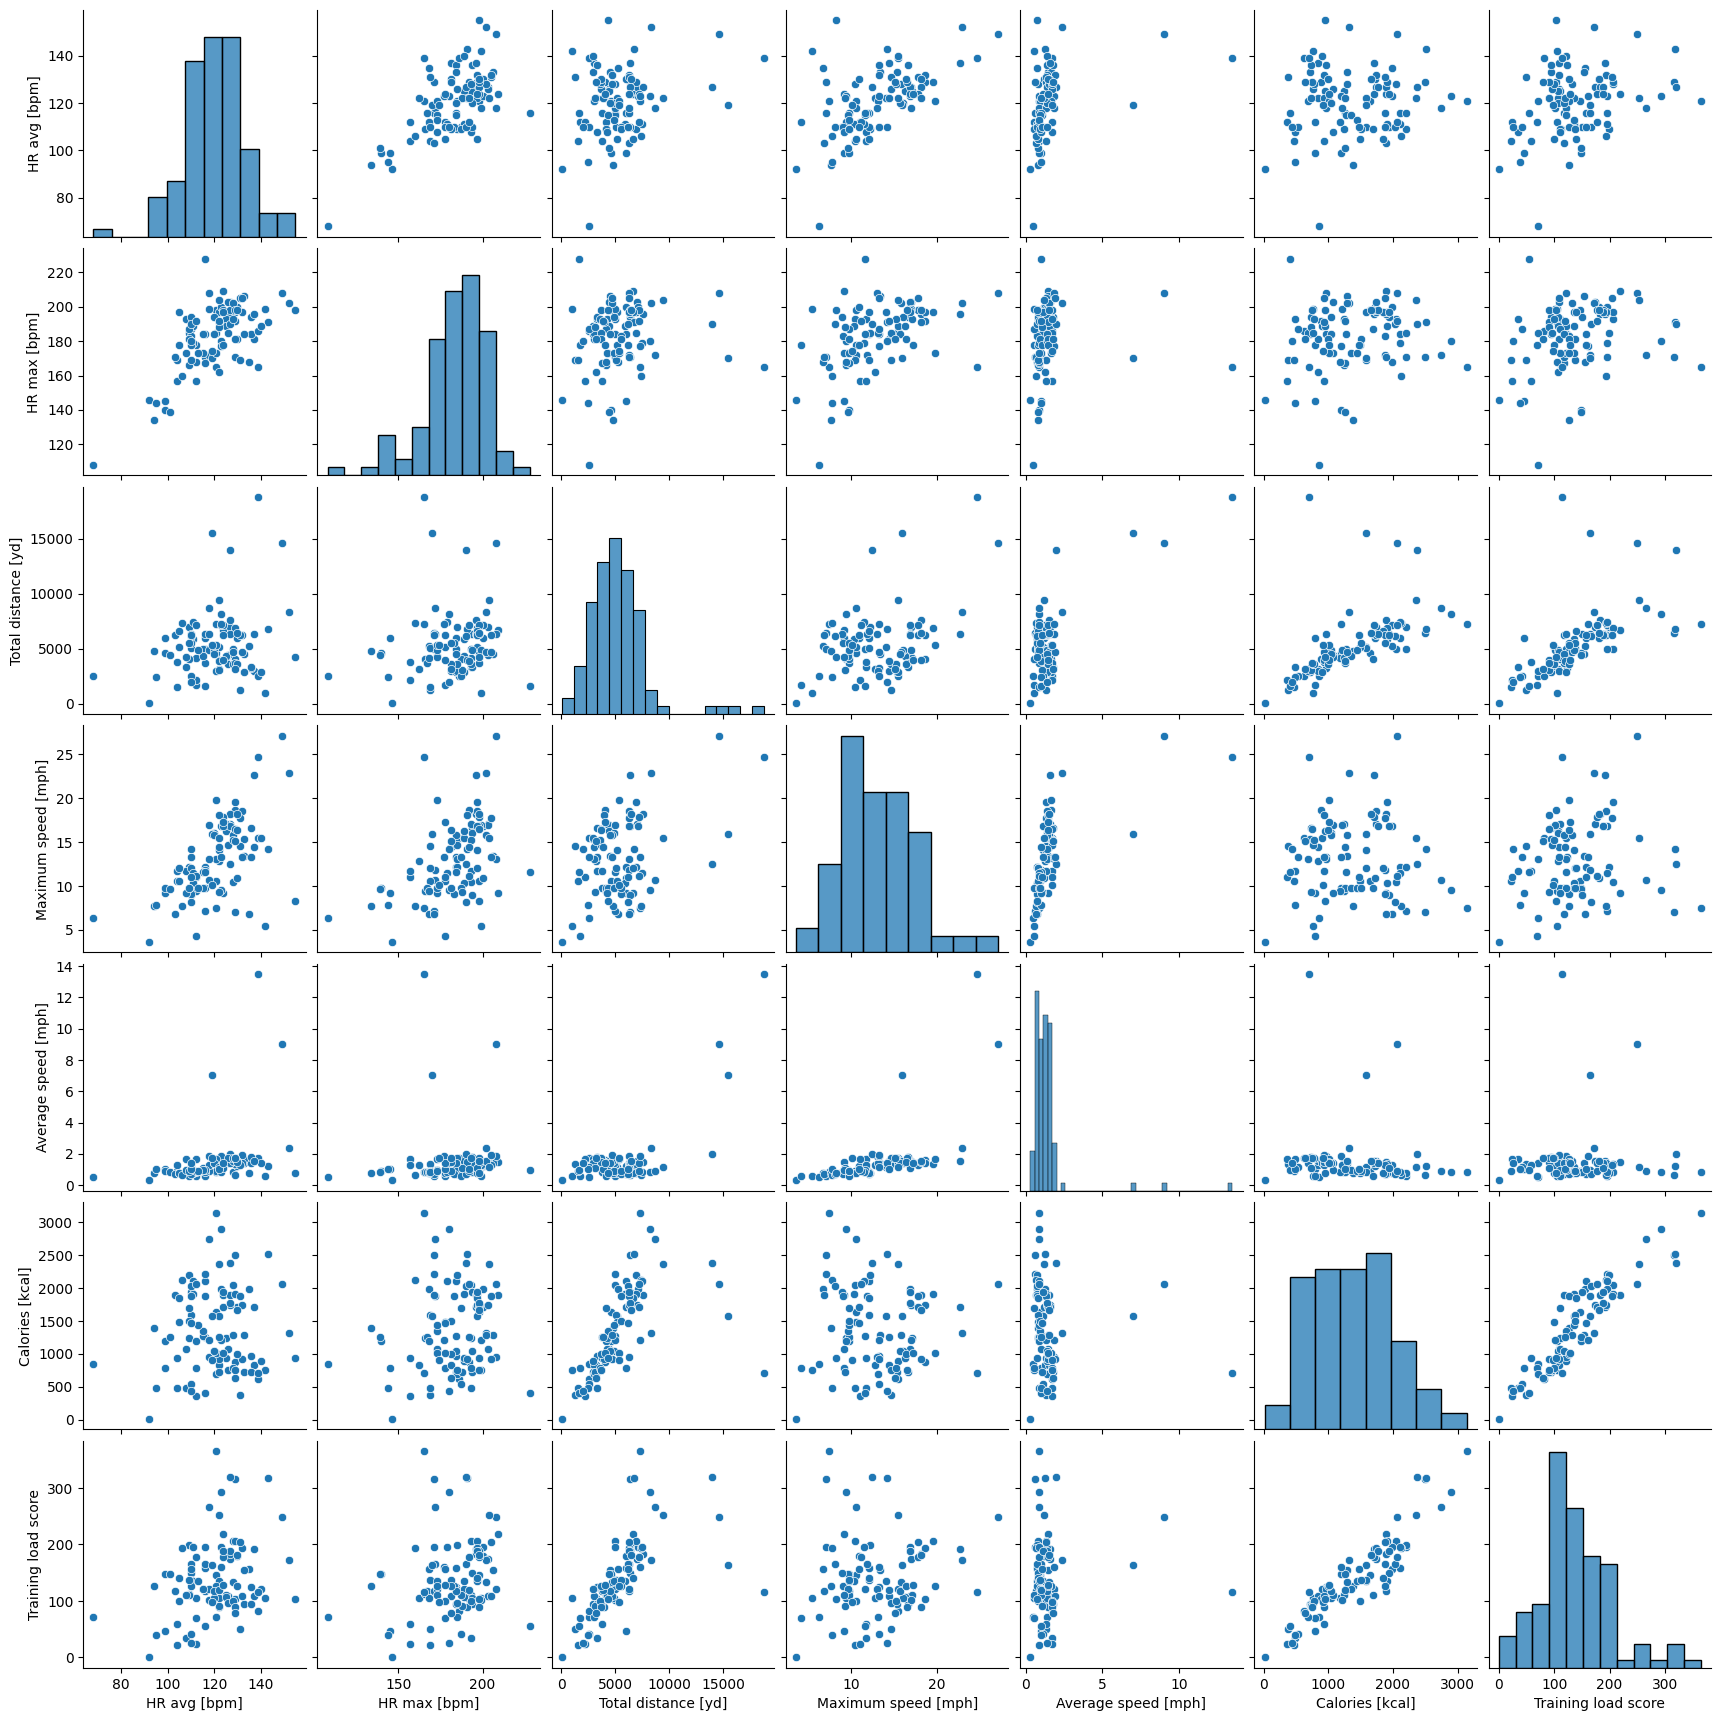

In [39]:
sns.pairplot(dft22.drop(labels=['Day','Duration'],axis=1))

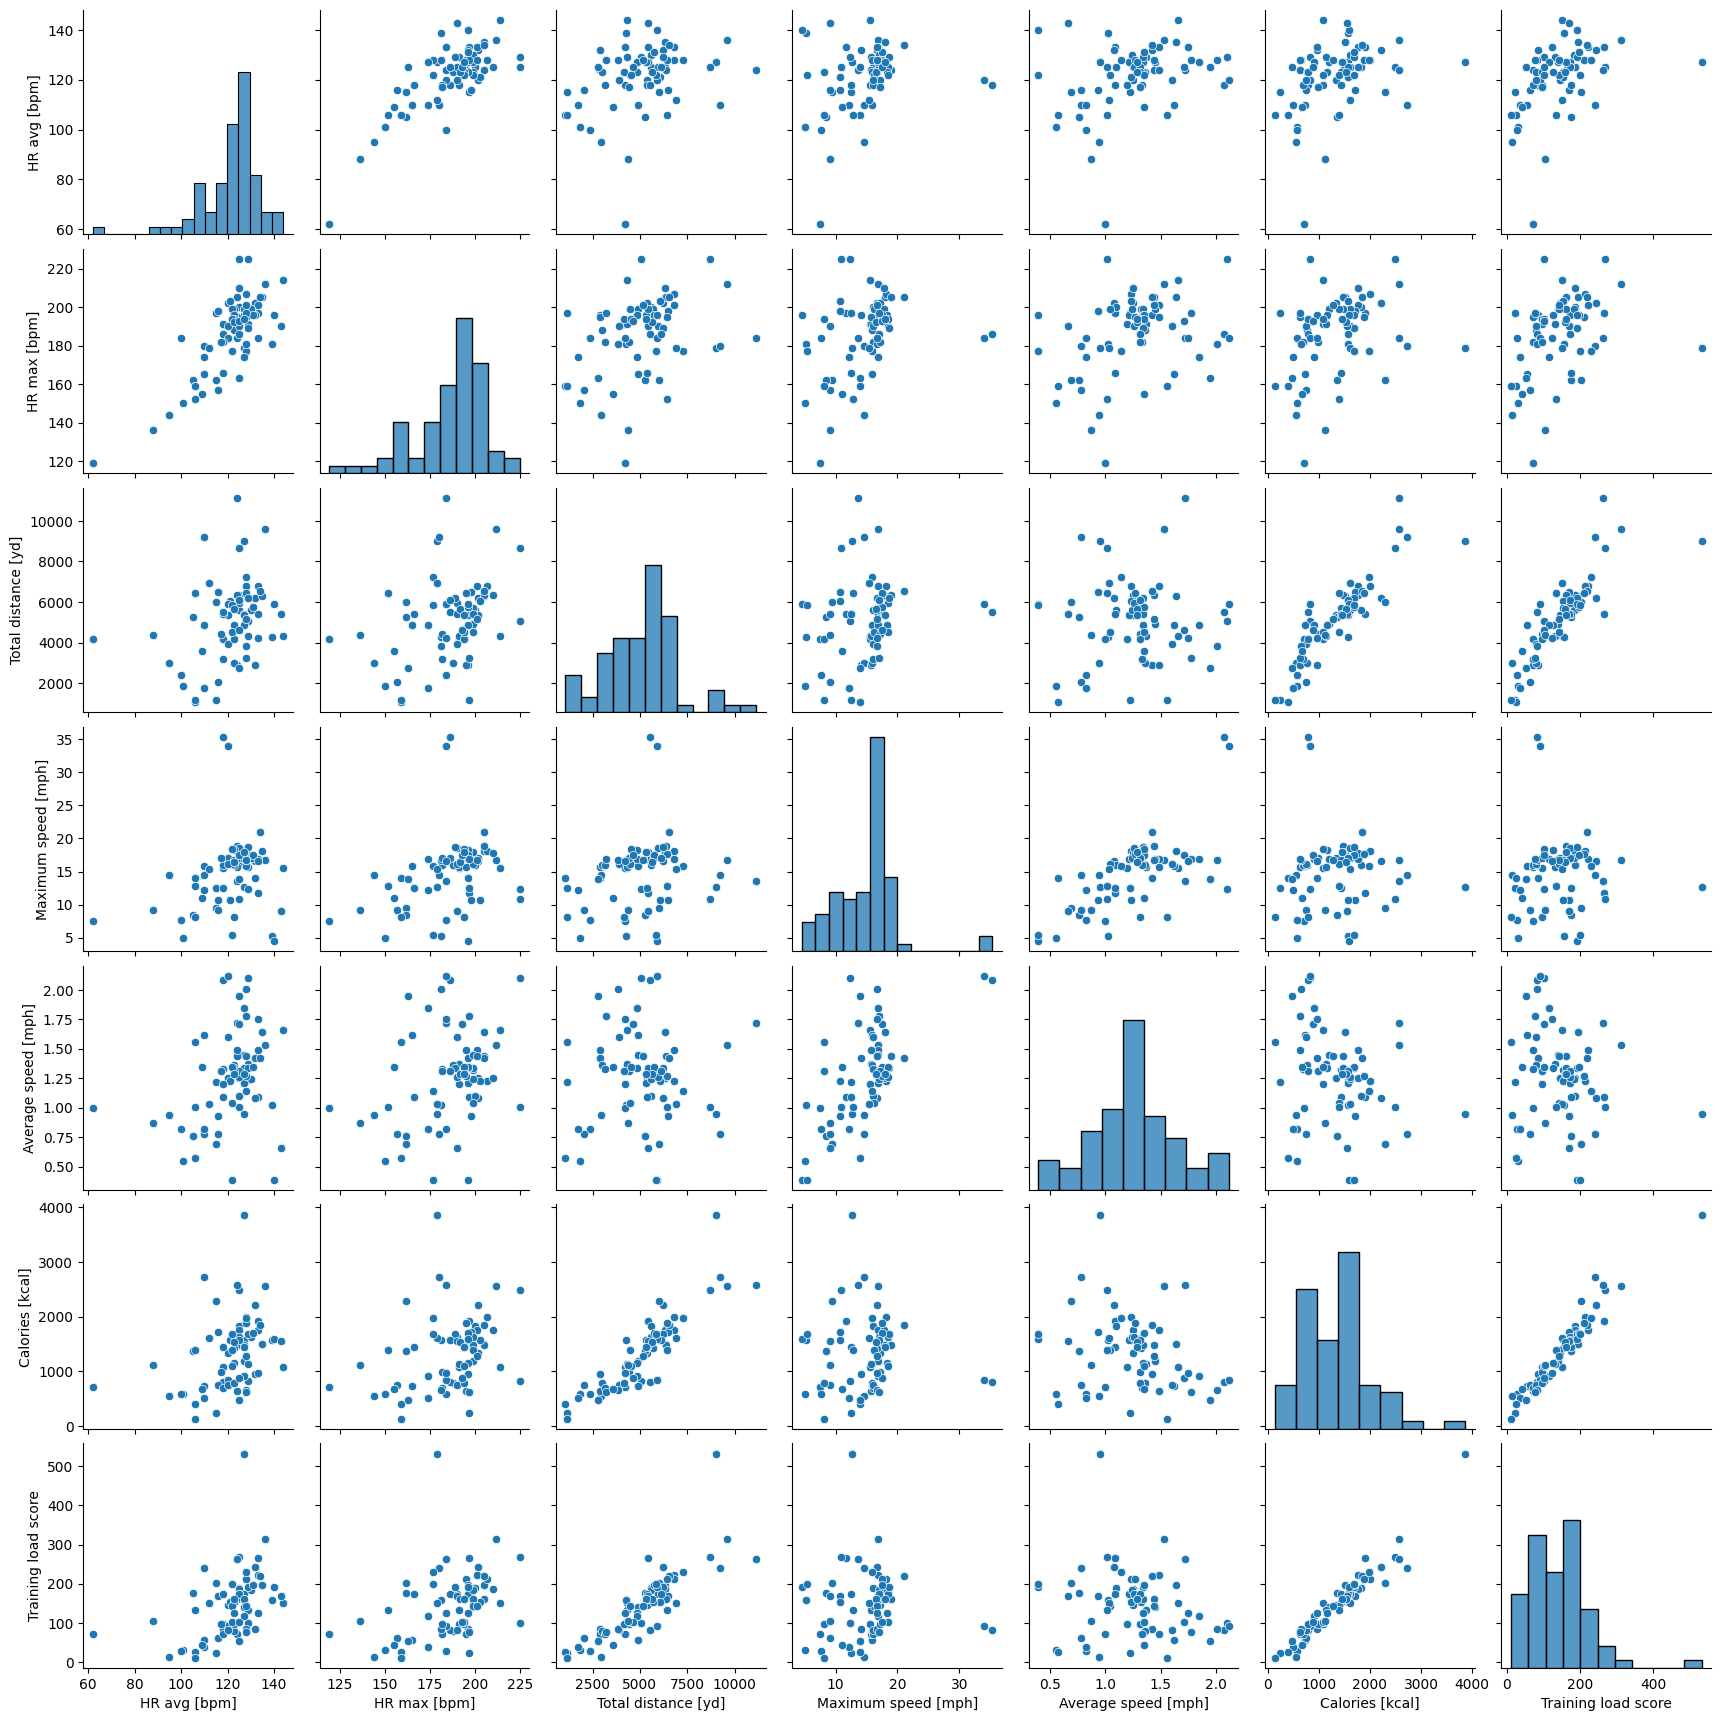

In [40]:
sns.pairplot(dft23.drop(labels=['Day','Duration'],axis=1))

In [41]:
#normalize data
norm_dfin22=(dfin22-dfin22.mean())/dfin22.std()
norm_dfin23=(dfin23-dfin23.mean())/dfin23.std()

#split dataset into input (x) and output (y)
Xtrain=norm_dfin22.to_numpy()
ytrain=dfSOE22['Percent SOE'].to_numpy()
#ytrain=(ytrain-ytrain.mean())/ytrain.std()

Xtest=norm_dfin23.to_numpy()
ytest=dfSOE23['Percent SOE'].to_numpy()
#ytest=(ytest-ytest.mean())/ytest.std()

In [42]:
dfSOE23["Percent SOE"]

1     1.000000
2     0.733333
3     0.400000
4     0.933333
5     0.800000
6     0.600000
7     0.400000
8     0.600000
9     0.600000
10    0.733333
11    0.533333
12    0.866667
13    0.333333
Name: Percent SOE, dtype: float64

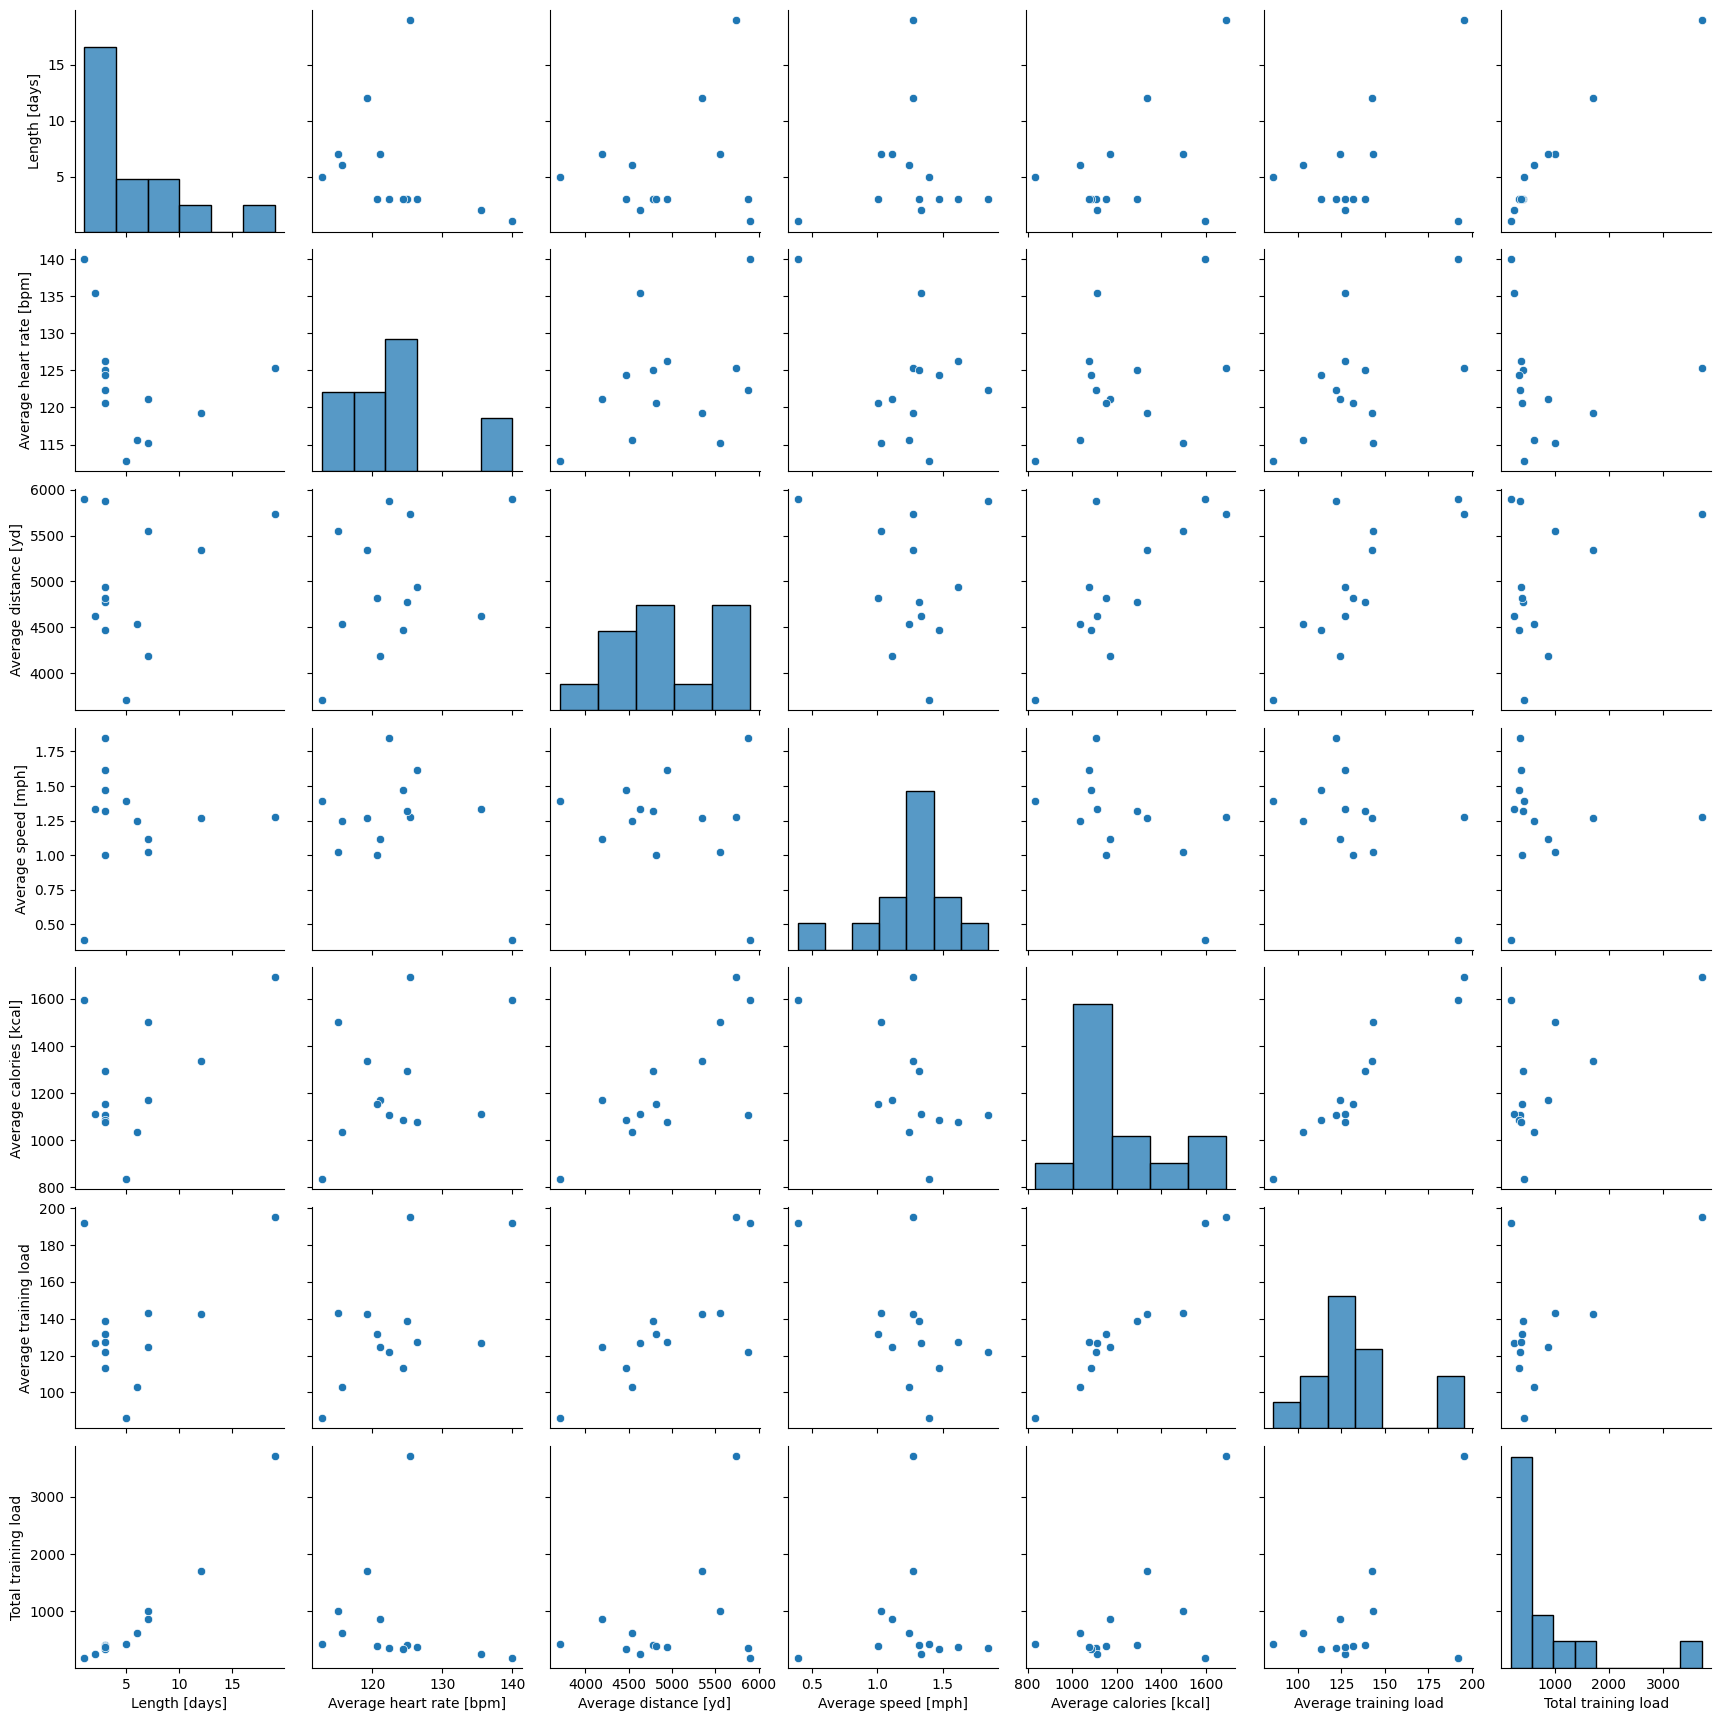

In [43]:
sns.pairplot(dfin23)

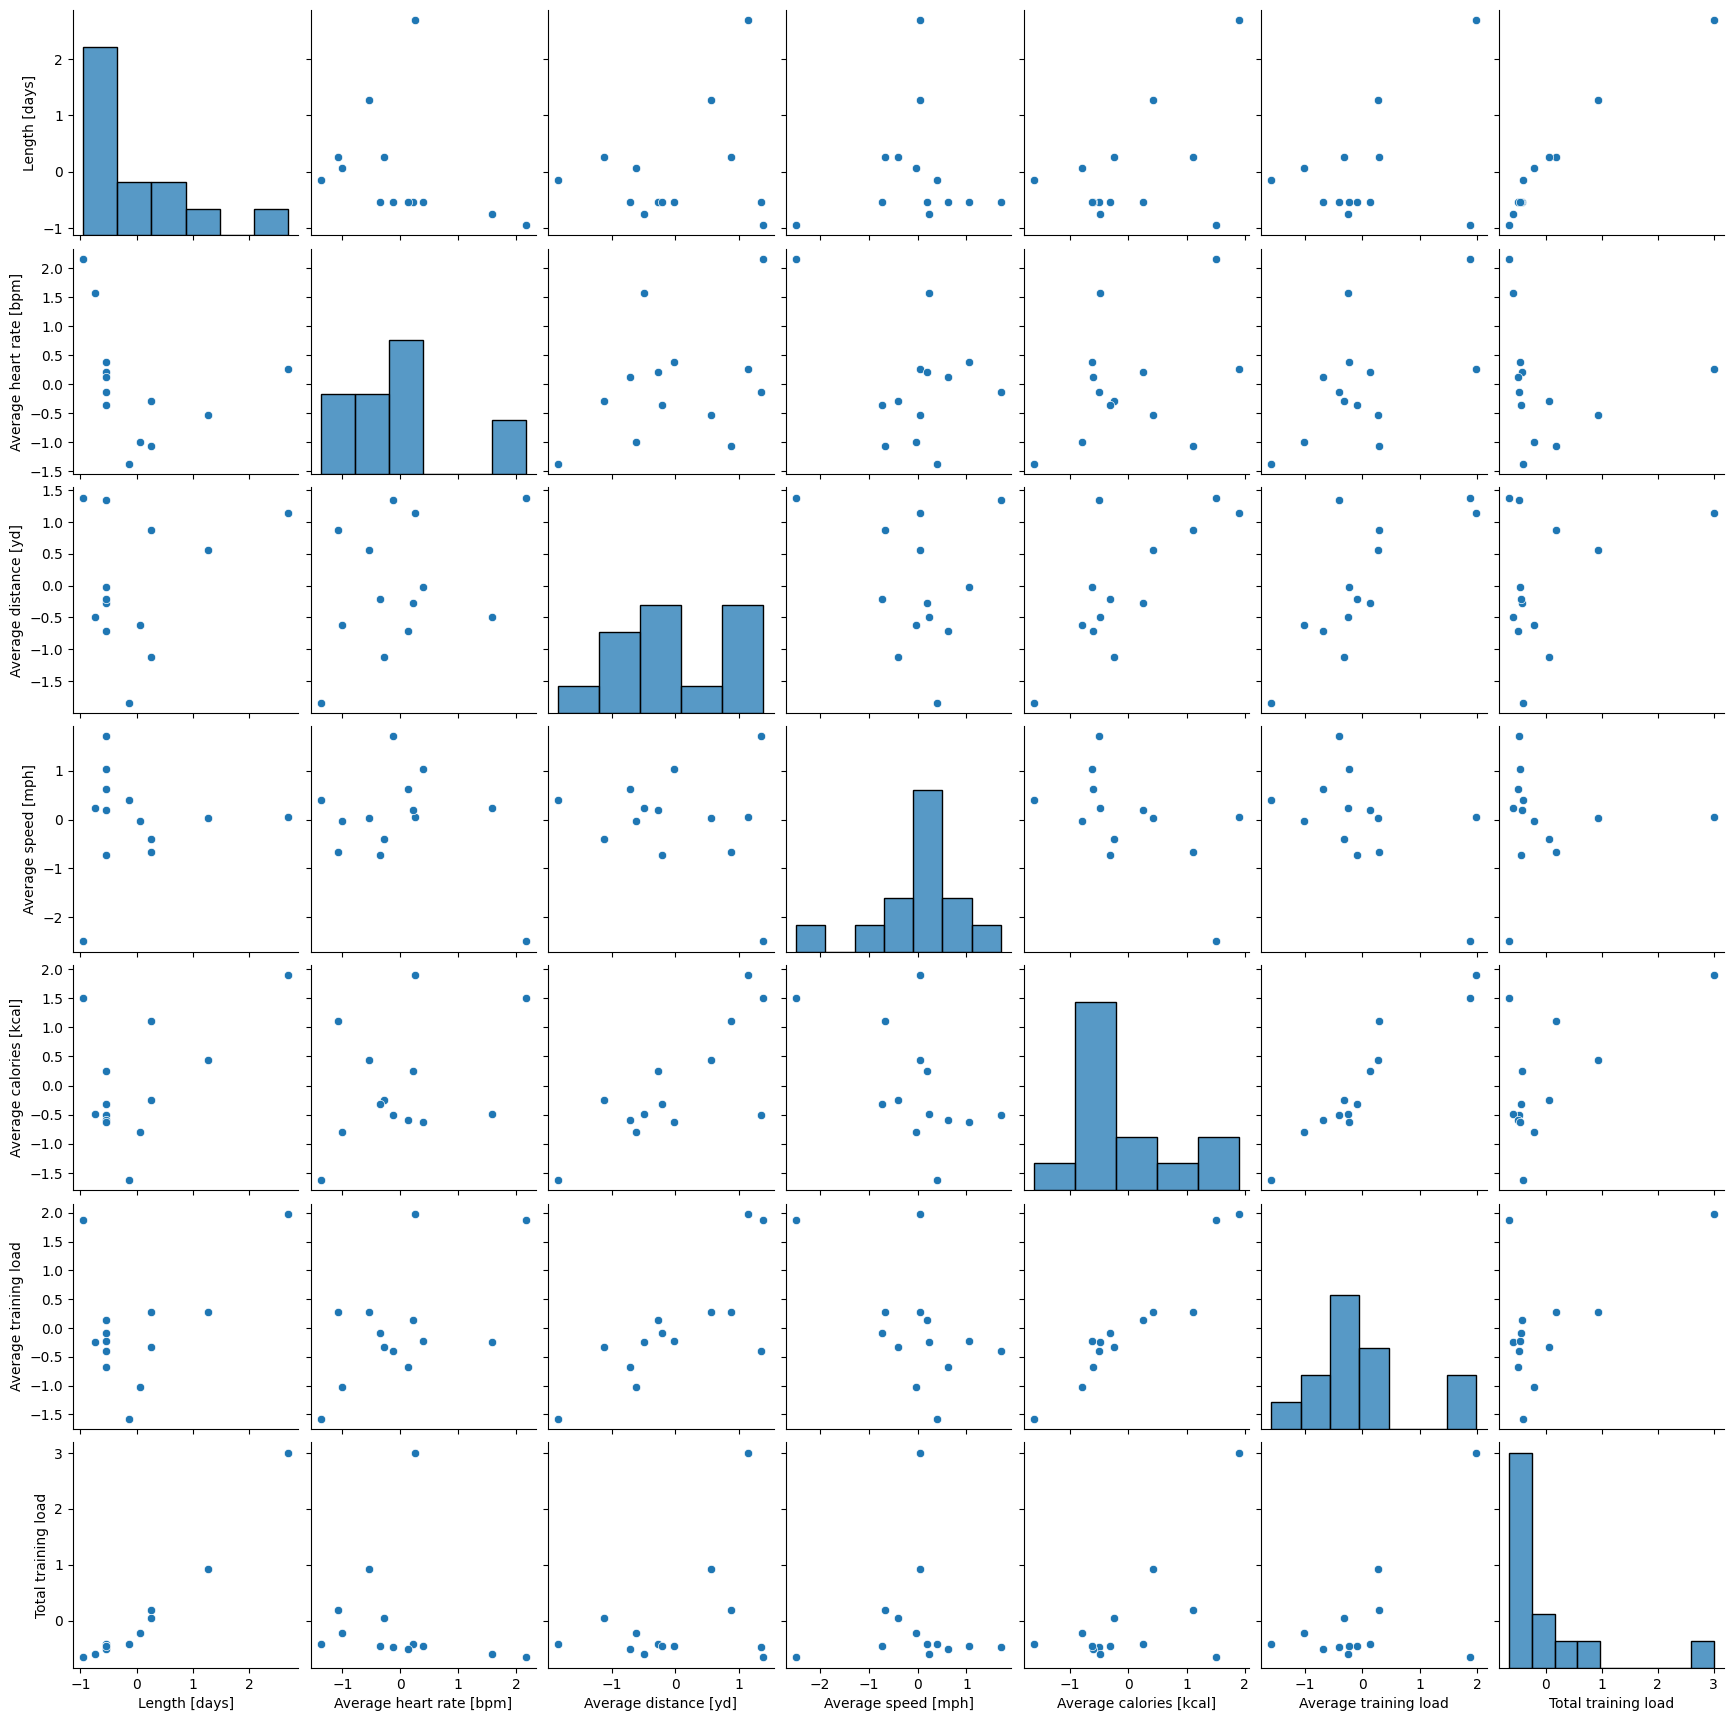

In [44]:
sns.pairplot(norm_dfin23)

In [71]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from tensorflow.python.keras.optimizers import *
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

for i in range(35): 
  #define keras model
  model = Sequential()
  model.add(Dense(i,input_dim=7,activation='sigmoid'))
  model.add(Dense(1))

  #compile the keras model
  opt = optimizers.Adam(learning_rate=0.001)
  mse = tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.SUM)
  model.compile(loss=mse, optimizer=opt)

  #fit the keras model on the dataset (CPU)
  model.fit(Xtrain,ytrain,epochs=500,batch_size=1, verbose=0)
  model.summary()

  #make class predictions with the model
  predictions = model.predict(Xtest)

  #for i in range(len(ytest)):
   #   print('%s => %.2f (expected %.2f)' %(Xtest[i].tolist(), predictions[i], ytest[i]) )

  print("R2 score =", round(r2_score(ytest,predictions),2))
  print("mean squared error =", round(mean_squared_error(ytest,predictions),5))

Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_98 (Dense)            (None, 0)                 0         
                                                                 
 dense_99 (Dense)            (None, 1)                 1         
                                                                 
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 48ms/step
R2 score = -1246.5
mean squared error = 51.04809
Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_100 (Dense)           (None, 1)                 8         
                                                                 
 dense_101 (Dense)           (None, 1)                 2         
 

In [70]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from tensorflow.python.keras.optimizers import *
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


#define keras model
model = Sequential()
model.add(Dense(24,input_dim=7,activation='sigmoid'))
model.add(Dense(1))

#compile the keras model
opt = optimizers.Adam(learning_rate=0.001)
mse = tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.SUM)
model.compile(loss=mse, optimizer=opt)

#fit the keras model on the dataset (CPU)
model.fit(Xtrain,ytrain,epochs=500,batch_size=1, verbose=0)
model.summary()

#make class predictions with the model
predictions = model.predict(Xtest)

#for i in range(len(ytest)):
  #   print('%s => %.2f (expected %.2f)' %(Xtest[i].tolist(), predictions[i], ytest[i]) )

print("R2 score =", round(r2_score(ytest,predictions),2))
print("mean squared error =", round(mean_squared_error(ytest,predictions),5))

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_96 (Dense)            (None, 24)                192       
                                                                 
 dense_97 (Dense)            (None, 1)                 25        
                                                                 
Total params: 217
Trainable params: 217
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 91ms/step
R2 score = -1.06
mean squared error = 0.08449


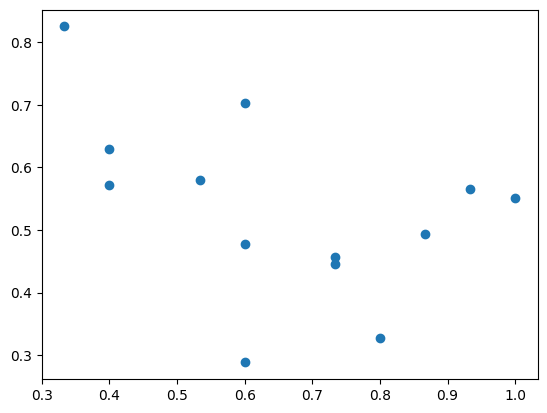

In [49]:
import matplotlib.pyplot as plt

plt.scatter(ytest, predictions)


In [77]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
RF_reg=RandomForestRegressor()
RF_reg.fit(Xtrain,ytrain)
pred_rf=RF_reg.predict(Xtest)

print("R2 score =", round(r2_score(ytest,pred_rf),2))
print("mean squared error =", round(mean_squared_error(ytest,pred_rf),5))

R2 score = -1.32
mean squared error = 0.09486


In [84]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score
SV=SVR(kernel='rbf', gamma='scale', coef0=0.0, tol=0.001, C=1.0, 
       epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)
SV.fit(Xtrain,ytrain)
pred_sv=SV.predict(Xtest)
print("R2 score =", round(r2_score(ytest,pred_sv),2))
print("mean squared error =", round(mean_squared_error(ytest,pred_sv),5))

R2 score = -1.14
mean squared error = 0.08737


In [96]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import r2_score
dt_clf = DecisionTreeRegressor(criterion='squared_error',
    splitter='best')
dt_clf.fit(Xtrain, ytrain)
y_pred_dt = dt_clf.predict(Xtest)

print("R2 score =", round(r2_score(ytest,y_pred_dt),2))
print("mean squared error =", round(mean_squared_error(ytest,y_pred_dt),5))

R2 score = -0.55
mean squared error = 0.06342


In [ ]:
Xtest.shape

(13, 8)

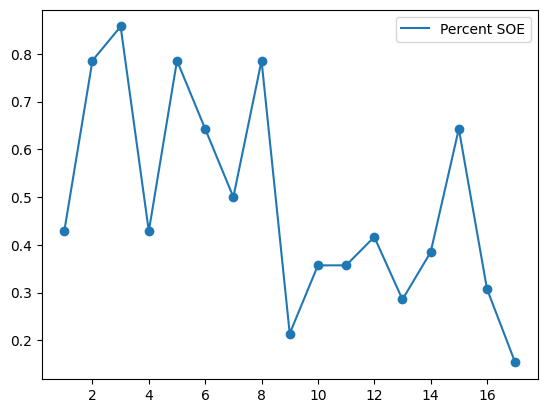

In [ ]:
dfSOE22.plot(y='Percent SOE', use_index=True)
plt.scatter(x=dfSOE22.index,y=dfSOE22['Percent SOE'])

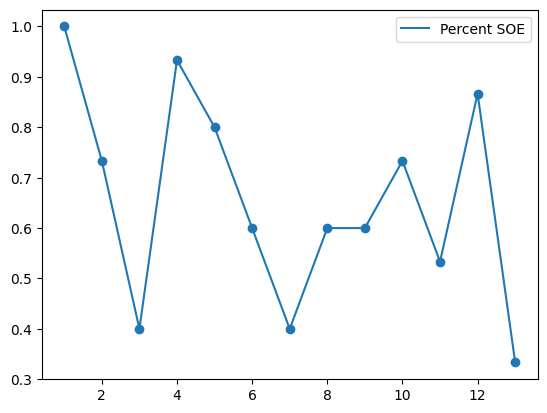

In [ ]:
dfSOE23.plot(y='Percent SOE', use_index=True)
plt.scatter(x=dfSOE23.index,y=dfSOE23['Percent SOE'])

<Axes: xlabel='Percent SOE', ylabel='W/L'>

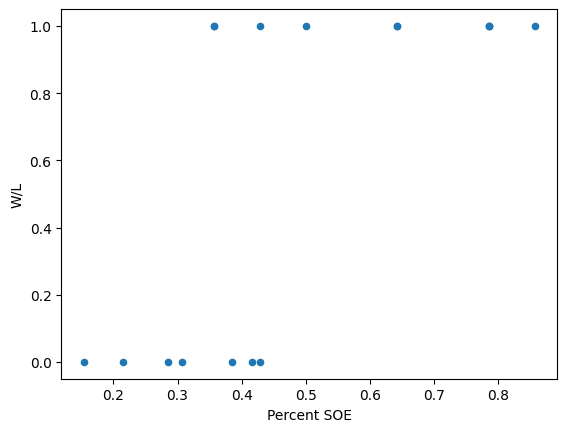

In [ ]:
dfSOE22.plot(x='Percent SOE',y='W/L',kind='scatter')

<Axes: xlabel='Percent SOE', ylabel='W/L'>

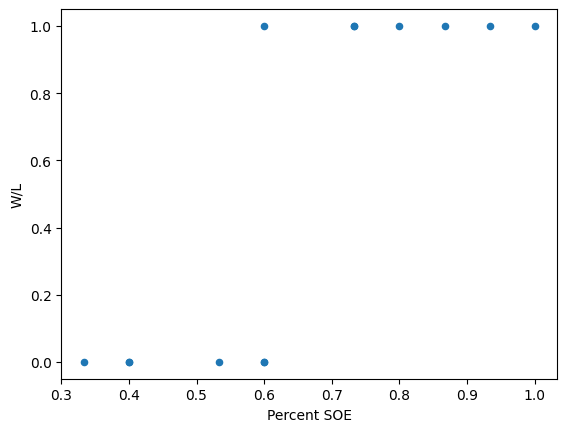

In [ ]:
dfSOE23.plot(x='Percent SOE',y='W/L',kind='scatter')